In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("house_price.csv")

# Display the first few rows
df.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [2]:
print(df.isnull().sum())

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [3]:
# Summary statistics
print(df.describe())


         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [4]:
# Unique values in categorical columns
print(df.nunique())

location           241
size                31
total_sqft        1972
bath                19
price             1952
bhk                 19
price_per_sqft    4951
dtype: int64


In [7]:
!pip install seaborn


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 3.7 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.1 MB 3.8 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/8.1 MB 4.3 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 4.9 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 5.4 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 5.1 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.1 MB 4.8 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   --------- --------------------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
%matplotlib inline


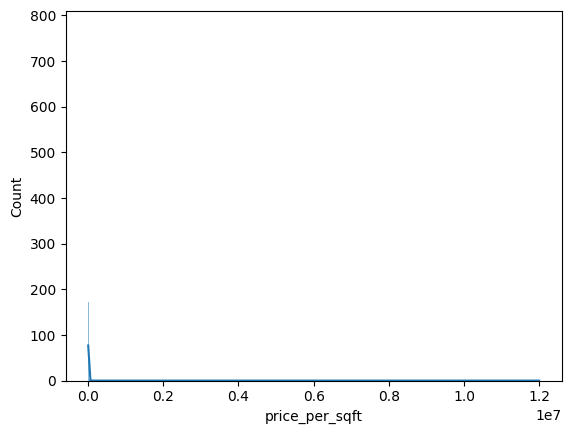

In [10]:
# Check the distribution of price per sqft
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['price_per_sqft'], kde=True)
plt.show()


In [26]:
# Calculate mean and standard deviation
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()

# Define upper and lower bounds
upper_bound = mean + 3*std
lower_bound = mean - 3*std

# Remove outliers
df_trimmed = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]


In [28]:
print(df_trimmed.head())

                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0          3699.0  
1          4615.0  
2          4305.0  
3          6245.0  
4          4250.0  


In [24]:
import numpy as np


In [25]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("house_price.csv")

# Compute Q1, Q3, and IQR
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['price_per_sqft'] = np.where(df['price_per_sqft'] < lower_bound, lower_bound, df['price_per_sqft'])
df['price_per_sqft'] = np.where(df['price_per_sqft'] > upper_bound, upper_bound, df['price_per_sqft'])


print(df.describe())


         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    13200.000000
mean    1555.302783      2.691136    112.276178      2.800833     6181.215985
std     1237.323445      1.338915    149.175995      1.292843     2631.064261
min        1.000000      1.000000      8.000000      1.000000      267.000000
25%     1100.000000      2.000000     50.000000      2.000000     4267.000000
50%     1275.000000      2.000000     71.850000      3.000000     5438.000000
75%     1672.000000      3.000000    120.000000      3.000000     7317.000000
max    52272.000000     40.000000   3600.000000     43.000000    11892.000000


In [29]:
# Calculate Q1, Q3, and IQR
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_iqr = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

In [30]:
print(df_iqr.head())  # Displays the first 5 rows


                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0          3699.0  
1          4615.0  
2          4305.0  
3          6245.0  
4          4250.0  


In [33]:
!pip install scipy



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
from scipy.stats import zscore

# Compute Z-score
df['z_score'] = zscore(df['price_per_sqft'])

# Remove outliers where |Z-score| > 3
df_zscore = df[df['z_score'].abs() < 3]

In [36]:
print(df_zscore.head())  # Displays the first 5 rows


                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft   z_score  
0          3699.0 -0.943462  
1          4615.0 -0.595301  
2          4305.0 -0.713129  
3          6245.0  0.024244  
4          4250.0 -0.734033  


In [38]:
# Define percentiles
lower_percentile = df['price_per_sqft'].quantile(0.05)
upper_percentile = df['price_per_sqft'].quantile(0.95)

# Remove outliers
df_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]


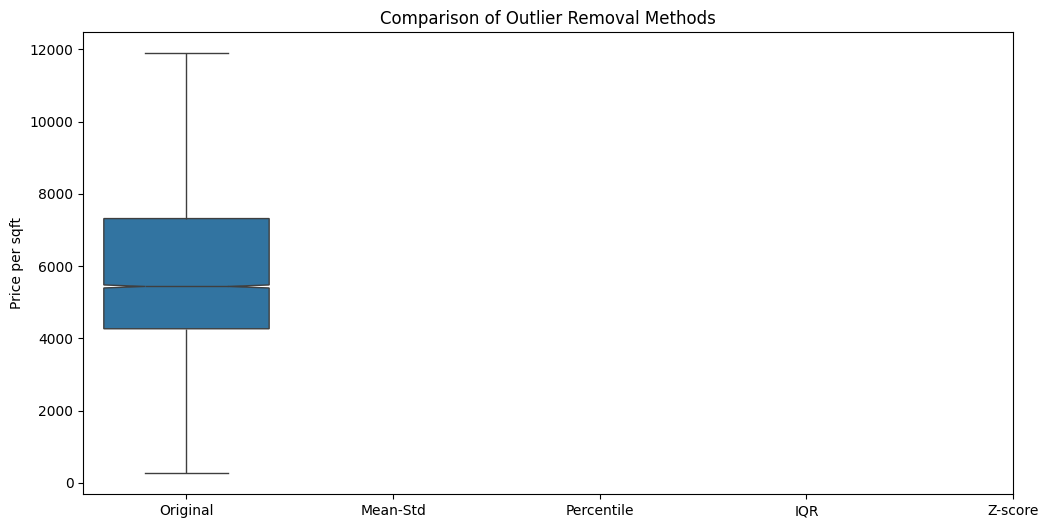

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(data=[df['price_per_sqft'], df_trimmed['price_per_sqft'], df_percentile['price_per_sqft'], df_iqr['price_per_sqft'], df_zscore['price_per_sqft']], notch=True)
plt.xticks([0,1,2,3,4], ['Original', 'Mean-Std', 'Percentile', 'IQR', 'Z-score'])
plt.ylabel('Price per sqft')
plt.title('Comparison of Outlier Removal Methods')
plt.show()


Skewness before transformation: 0.9755141550670372
Kurtosis before transformation: -0.014873831790893632
Skewness after transformation: 0.12349670366491486
Kurtosis after transformation: 0.27310847690545703


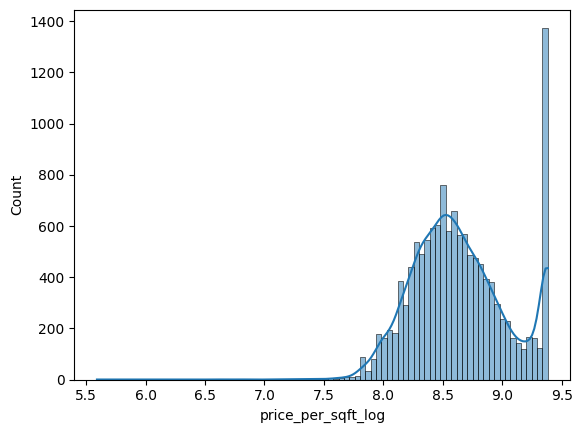

In [40]:

print("Skewness before transformation:", df['price_per_sqft'].skew())
print("Kurtosis before transformation:", df['price_per_sqft'].kurt())

# Log Transformation
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])

# Check skewness & kurtosis after transformation
print("Skewness after transformation:", df['price_per_sqft_log'].skew())
print("Kurtosis after transformation:", df['price_per_sqft_log'].kurt())

# Plot histogram after transformation
sns.histplot(df['price_per_sqft_log'], kde=True)
plt.show()


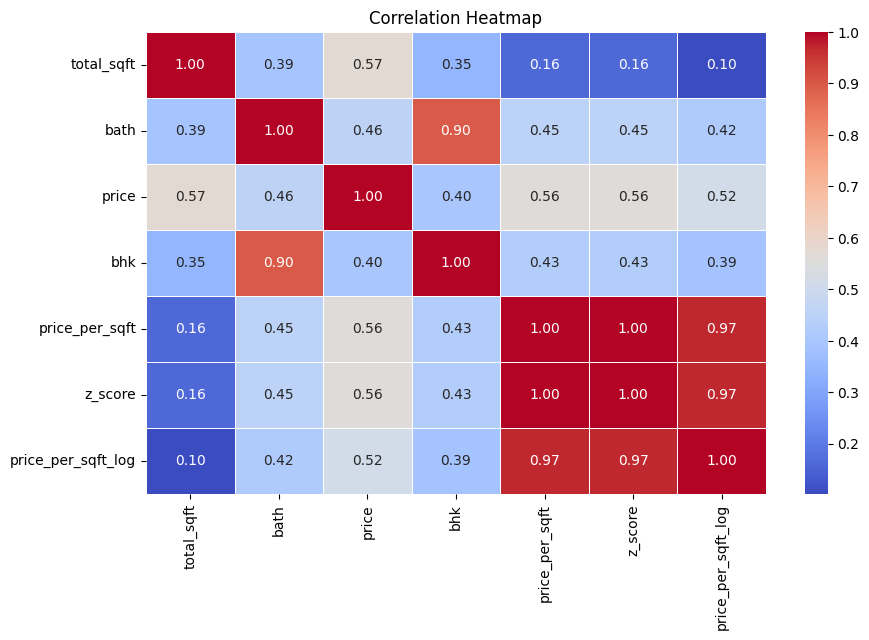

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


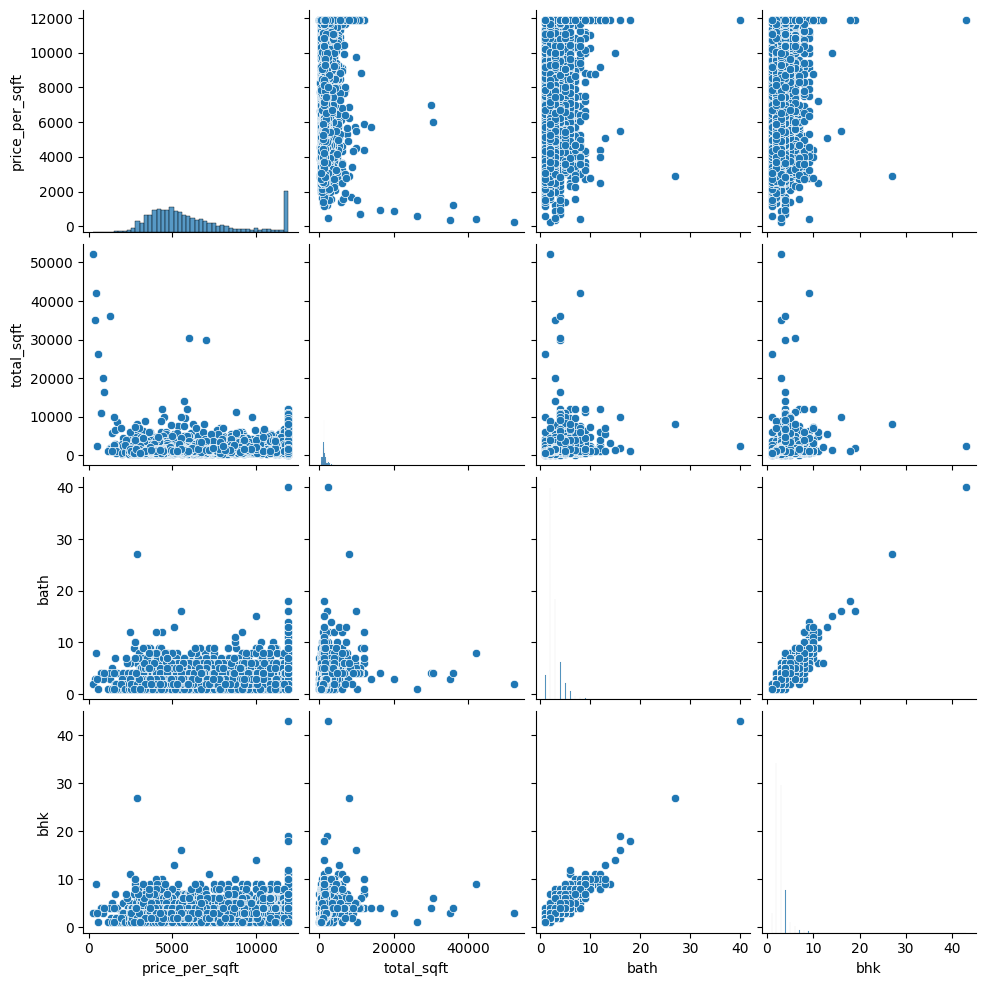

In [49]:
sns.pairplot(df, vars=['price_per_sqft', 'total_sqft', 'bath', 'bhk'])
plt.show()
